In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint as p
from algo import utils

In [2]:
experiment_name = 'maintask_fixed_room'
# experiment_name = 'subtask_key_fixed_room'
# experiment_name = 'subtask_chest_fixed_room'
# experiment_name = 'subtask_map_fixed_room'

# experiment_name = 'maintask_random_ft'
# experiment_name = 'subtask_key_random_ft'
# experiment_name = 'subtask_map_random_ft'

# experiment_name = 'maintask_no_resize'

# experiment_name = 'maintask_meta'
# experiment_name = 'maintask_meta_fixed_all'

max_episode_steps = 50

In [3]:
result_path = utils.get_workspace_path(experiment_name) / 'result.hdf5'

In [8]:
with h5py.File(result_path, 'r') as f:
    reward = f['episode_rewards']['total_reward'][:]
    p(list(f['agent_statics'].keys()))
    q1_loss = f['agent_statics']['average_q_func1_loss'][:]
    q1 = f['agent_statics']['average_q1'][:]

    # loss = f['agent_statics']['average_loss'][:]
    # q = f['agent_statics']['average_q'][:]

['average_entropy',
 'average_q1',
 'average_q2',
 'average_q_func1_loss',
 'average_q_func2_loss',
 'n_updates',
 'temperature']


27.075


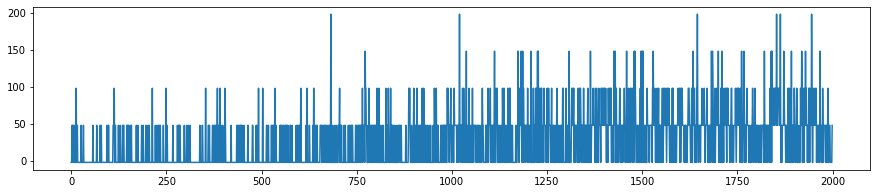

In [9]:
plt.figure(figsize=(15,3))
plt.plot(np.arange(len(reward)), reward)
print(np.mean(reward[reward!=0]))

each episode: 10


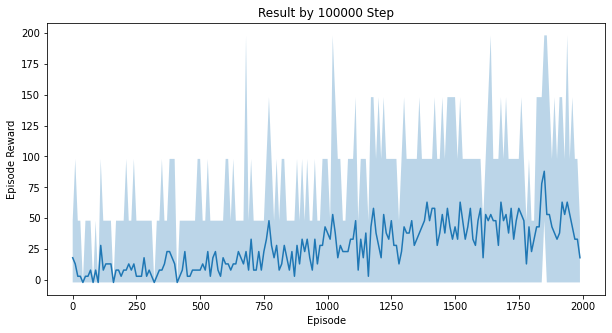

In [10]:
convolve_num = int(len(reward)*0.005)
print(f'each episode: {convolve_num}')
b = np.ones(convolve_num)/convolve_num
arr = np.array(reward).reshape((len(reward)//convolve_num, convolve_num))
arr_mean = np.mean(arr, axis=1)
arr_max = np.max(arr, axis=1)
arr_min = np.min(arr, axis=1)
arr_x = np.arange(len(arr)) * convolve_num

plt.figure(figsize=(10,5))
plt.title(f"Result by {len(reward) * max_episode_steps} Step")
plt.xlabel("Episode")
plt.ylabel("Episode Reward")

plt.plot(arr_x, arr_mean)
plt.fill_between(arr_x, arr_min, arr_max, alpha=0.3)

In [ ]:
# plt.figure(figsize=(10,5))
# plt.plot(q, label='Q', alpha=0.7)
# plt.plot(loss, label='Q Loss', alpha=0.7)
# plt.legend()

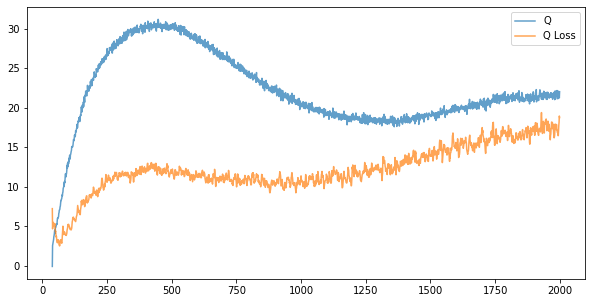

In [11]:
plt.figure(figsize=(10,5))
plt.plot(q1, label='Q', alpha=0.7)
plt.plot(q1_loss, label='Q Loss', alpha=0.7)
plt.legend()